## Her prøver vi oss med Type Token Ratio


In [23]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn, sttr

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

# lager et referansekorpus

refurns = get_urns_from_text('./urnref.txt')
refurns = {r for r in refurns if not r.startswith('2016') and not r.startswith('2017') and not r.startswith('2018')}

# Lager korpus

Dataene brukes i sammenligningen kommer fra lister over URNer som ligger i fila *urner_lettlest.txt*, og fra Dewey 808 (tar med et sample fra Dewey 839 også, som kan brukes etterpå).

WebDewey ligger [her](http://deweysearchno.pansoft.de/webdeweysearch/executeSearch.html?lastScheduleRecord=&lastTableRecord=&query=808.80384&catalogs=nb.no)

In [30]:
u_ttr = {u:nb.sttr(u) for u in urns}

In [31]:
r_ttr = {u:sttr(u) for u in refurns}

# STTR

Her tas ut 5000 ord i gangen.

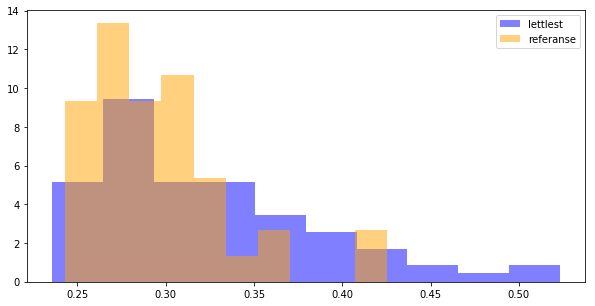

In [34]:
plt.figure(figsize=(10,5))
plt.hist(u_ttr.values(), color='blue', density=True, alpha = 0.5);
plt.hist(r_ttr.values(), color='orange', density = True, alpha=0.5);
plt.legend(['lettlest','referanse'])

# Prøver en annen chunking

Lavere chunking gir høyere TTR.

In [35]:
u_ttr_2 = {u:nb.sttr(u, chunk=2000) for u in urns}

In [36]:
r_ttr_2 = {u:sttr(u, chunk=2000) for u in refurns}

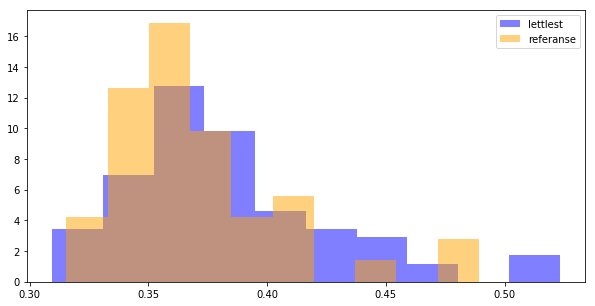

In [41]:
plt.figure(figsize=(10,5))
plt.hist(u_ttr_2.values(), color='blue', density=True, alpha = 0.5);
plt.hist(r_ttr_2.values(), color='orange', density = True, alpha=0.5);
plt.legend(['lettlest','referanse']);

# Høyere chunking

Høyere chunking skal gi lavere TTR, noe som blir tydeliggjort her hvor chunkstørrelsen er 20 000 ord.

In [38]:
u_ttr_3 = u_ttr = {u:nb.sttr(u, chunk=20000) for u in urns}

In [39]:
r_ttr_3 = {u:sttr(u, chunk=20000) for u in refurns}

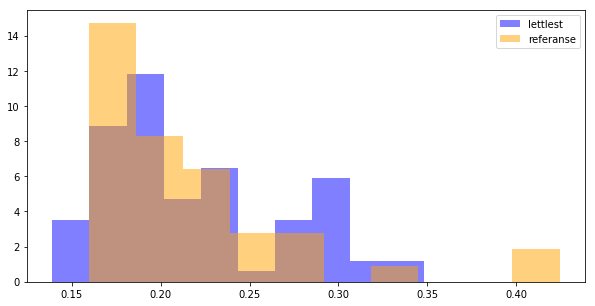

In [42]:
plt.figure(figsize=(10,5))
plt.hist(u_ttr_3.values(), color='blue', density=True, alpha = 0.5);
plt.hist(r_ttr_3.values(), color='orange', density = True, alpha=0.5);
plt.legend(['lettlest','referanse']);